In [2]:
import numpy as np
import matplotlib.pyplot as  plt
from tqdm import tqdm

from np_fun import prob, prob_part
#from tf_fun import init as tf_init
from Annealing import Annealer

#%load_ext autoreload 
%autoreload 2

UsageError: Line magic function `%autoreload` not found.


In [3]:
tst = lambda z,x: np.sin(z[0]*x+z[1])+z[0]+np.cos(2*z[1])+z[0]*z[1]
carr =lambda f,z: lambda x: f(z,x)
sampl = lambda f,fm=0,to=10,cnt=100: [np.linspace(fm,to,cnt),list(map(f,np.linspace(fm,to,cnt)))]

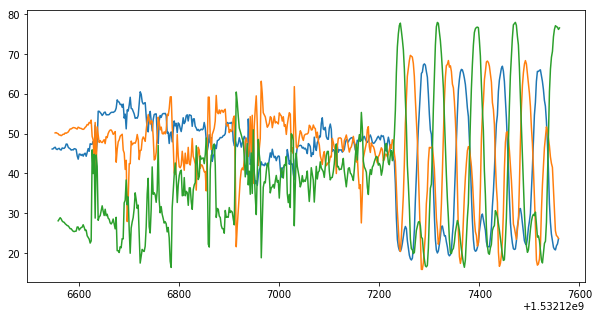

In [4]:
from numpy import genfromtxt
best_filenames=[
    './20_07/data_21-07-2018_01-59_port0.csv',
    './20_07/data_21-07-2018_01-59_port1.csv',
    './20_07/data_21-07-2018_01-59_port2.csv',
]
filenames = [
    './data_05-07-2018_20-20_port0.csv',
    './data_05-07-2018_20-30_port1.csv',
    './data_05-07-2018_20-20_port2.csv'
]
filenames = best_filenames
exp_points = [genfromtxt(i, delimiter=',') for i in filenames]
#times = [np.array(exp_points[i].T[1]) for i in range(len(filenames))]
times = [np.array(i.T[1]) for i in exp_points]
exp_points = [np.array(i.T[0]) for i in exp_points]
#exp_points = np.array([ ea[:502] for ea in exp_points])
# plot the data
plt.figure(figsize=(10,5))
for i,t in zip(exp_points,times):
    plt.plot(t,i)


### period is approx 120 sec, ampl 110-40=70, mean min is 43

(3, 140) (3, 140)
0.014227234882774553
Data points used: 3


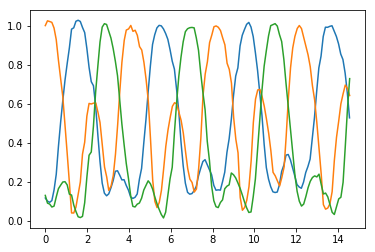

In [5]:
scaling_channels = [0.88,0.91,1.03]
exp_points = [exp_points[i]/scaling_channels[i] for i in range(len(exp_points))]
me_min, ampl, per = 15, 80-20, 80
start_exp, end_exp = -150, -10

data = np.array([ ep[start_exp:end_exp] for ep in exp_points])
pts = np.array([ t[start_exp:end_exp]-t[start_exp] for t in times])
print(data.shape,pts.shape)


data = data - me_min
data /= ampl
pts = pts/120*2*np.pi
for i,t in zip(data,pts):
    plt.plot(t,i)
l = len(pts)
pts
print(max(pts[1]-pts[2]))
pts = pts[0]
print('Data points used:',l)

[ 0.          0.06819767  0.13639534  0.204593    0.27279067  0.34098834
  0.40918601  0.47738368  0.54558135  0.61377901  0.68197668  0.75017435
  0.81837202  0.88656969  0.95476736  1.02296502  1.09116269  1.15936036
  1.22755803  1.2957557   1.36395336  1.43215103  1.5003487   1.56854637
  1.63674404  1.70494171  1.77313937  1.84133704  1.90953471  1.97773238
  2.04593005  2.11412772  2.18232538  2.25052305  2.31872072  2.38691839
  2.45511606  2.52331372  2.59151139  2.65970906  2.72790673  2.7961044
  2.86430207  2.93249973  3.0006974   3.06889507  3.13709274  3.20529041
  3.27348808  3.34168574  3.40988341  3.47808108  3.54627875  3.61447642
  3.68267408  3.75087175  3.81906942  3.88726709  3.95546476  4.02366243
  4.09186009  4.16005776  4.22825543  4.2964531   4.36465077  4.43284844
  4.5010461   4.56924377  4.63744144  4.70563911 -4.77383678 -4.70563911
 -4.63744144 -4.56924377 -4.5010461  -4.43284844 -4.36465077 -4.2964531
 -4.22825543 -4.16005776 -4.09186009 -4.02366243 -3.9

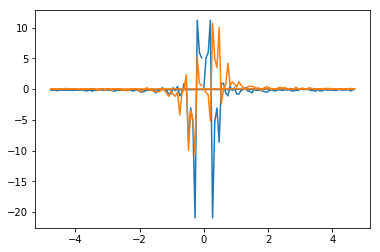

In [6]:
ft = np.fft.fft(data[0]-np.mean(data[0]))
freq = np.fft.fftfreq(ft.shape[-1],d=pts[1])
plt.plot(freq,ft.real)
plt.plot(freq,ft.imag)
print(freq)

80 11.668611435239207


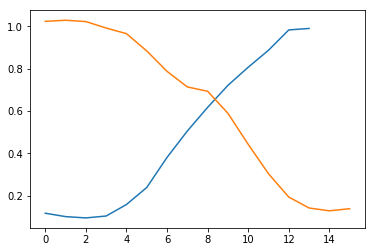

In [7]:
#### per = 1/0.15006
units_period = 1/0.0857
print(per,units_period)
plt.plot(data[0][:14])
plt.plot(data[0][14:30])


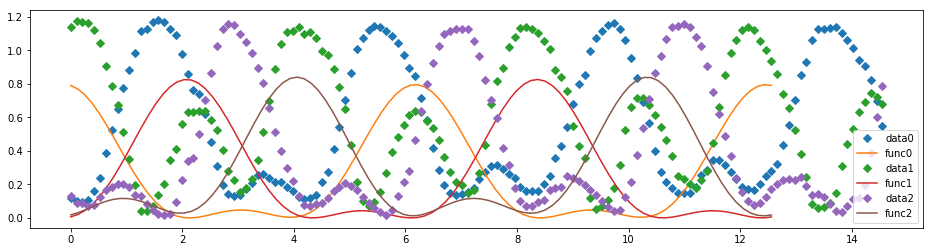

In [8]:
def func(x):
    return np.abs(np.square(prob_part(0,0,0,0,phi=x)))
def plot3(func,on_same=False):
    lin,d = sampl(func,0,12.56,100)
    d = np.array(d).T
    %matplotlib inline
    fs=(16,4)
    if on_same:
        plt.figure(figsize=fs)
        ax =[plt,plt,plt]
    else:
        f,ax = plt.subplots(1,3,figsize=fs,sharey=True)
    for i in range(3):
        ax[i].plot(pts,data[i],'D',label='data%i'%i)
        ax[i].plot(lin,d[i],label='func%i'%i)
    plt.legend()
        
data_orig = data
transform_fun = lambda x: 1*np.sqrt(np.square(x)*(1+0.3*np.square(x)))
data = list(map(transform_fun,data_orig))
plot3(func,on_same=True)

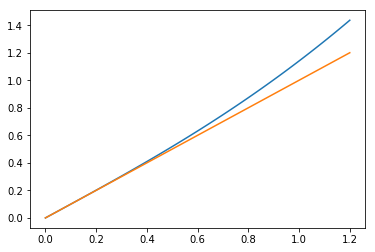

In [9]:
x = np.linspace(0,1.2,100)
y = transform_fun(x)
plt.plot(x,y)
plt.plot(x,x)

In [10]:
fixed = [0,0]
tst = lambda z,x: np.sin(z[0]*x+z[1])+z[0]+np.cos(2*z[1])+z[0]*z[1]
carr =lambda f,z: lambda x: f(z,x)
sampl_map_depr = lambda f,fm=0,to=10,cnt=100: [np.linspace(fm,to,cnt),list(map(f,np.linspace(fm,to,cnt)))]
sampl = lambda f,fm=0,to=10,cnt=100: [np.linspace(fm,to,cnt),f(np.linspace(fm,to,cnt))]
np_map = lambda f,x: np.array(list(map(f, x)))

device = lambda z,x:np.abs(np.square(prob_part(z[0],z[1],fixed[0],fixed[1],phi=x)))
unit = lambda z,x: device(z,x).dot(np.array([0,1,0]).T)
cost = lambda f,data,points=pts: np.sum(np.square(f(points).T-data))
foo = lambda x: unit([0,0],x)

ttt = carr(unit,[0,0])
print(np_map(ttt,pts))
cost(carr(device,[0,0]),data,pts)


[6.45591224e-03 1.75567874e-02 3.50554667e-02 5.94443922e-02
 9.09508348e-02 1.29570240e-01 1.74890087e-01 2.26327421e-01
 2.82906585e-01 3.43500783e-01 4.06682851e-01 4.70867505e-01
 5.33879981e-01 5.94995464e-01 6.51964448e-01 7.03101782e-01
 7.46937451e-01 7.82104639e-01 8.07553813e-01 8.22506098e-01
 8.26483152e-01 8.19361614e-01 8.01374336e-01 7.73060129e-01
 7.35295690e-01 6.89258829e-01 6.36286617e-01 5.77999600e-01
 5.16027922e-01 4.52143104e-01 3.88082543e-01 3.26031769e-01
 2.66444066e-01 2.11178250e-01 1.61428182e-01 1.17978958e-01
 8.13721296e-02 5.19034805e-02 2.95087905e-02 1.38906808e-02
 4.48503692e-03 5.14037788e-04 1.03380707e-03 4.98768890e-03
 1.12712198e-02 1.87775659e-02 2.64626462e-02 3.33938710e-02
 3.88116399e-02 4.21456152e-02 4.30610891e-02 4.14823723e-02
 3.75348325e-02 3.16557735e-02 2.44336316e-02 1.66873593e-02
 9.38428737e-03 3.59021054e-03 4.17574009e-04 9.64720384e-04
 6.26304873e-03 1.72186621e-02 3.45474147e-02 5.87683256e-02
 9.01182605e-02 1.285560

113.29622221725623

In [11]:
def get_parametric(func,dots=50):
    xrange = np.linspace(-7.0, 7.0, dots)
    yrange = np.linspace(-7.0, 7.0, dots)
    p = np.zeros((len(xrange),len(yrange)))
    f2d = lambda x,y:cost(carr(func,[x,y]),data)
    #f2d = lambda x,y:opt.prob(x,y,12)
    for x in tqdm(range(len(xrange))):
        for y in range(len(yrange)):
            p[y,x] =  f2d(xrange[x],yrange[y])
    return xrange,yrange,p

def display_parametric(p):
    best_pos=np.unravel_index( np.argmin(p),p.shape)
    best_pos = [xrange[best_pos[0]], yrange[best_pos[1]]]
    print("Min cost is:",np.min(p),' at position ',best_pos)
    
    %matplotlib notebook
    plt.contourf(xrange,yrange,p,100)
    #plt.savefig('fig.png',dpi=300)
xrange,yrange,p = get_parametric(device)
print()

100%|██████████| 50/50 [00:03<00:00, 16.48it/s]

In [12]:
best_pos=np.unravel_index( np.argmin(p),p.shape)
best_pos = [xrange[best_pos[1]], yrange[best_pos[0]]]
print("Min cost is:",np.min(p),' at position ',best_pos)

Min cost is: 85.0130081416654  at position  [6.142857142857142, -3.0]


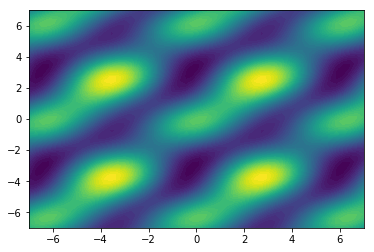

In [13]:

%matplotlib inline
plt.contourf(xrange,yrange,p,50)

#plt.scatter(*np.array(opt.dots).T,c=np.arange(len(opt.dots)),marker='o',alpha=0.7)
#plt.savefig('fig.png',dpi=300)

cost is  85.0130081416654


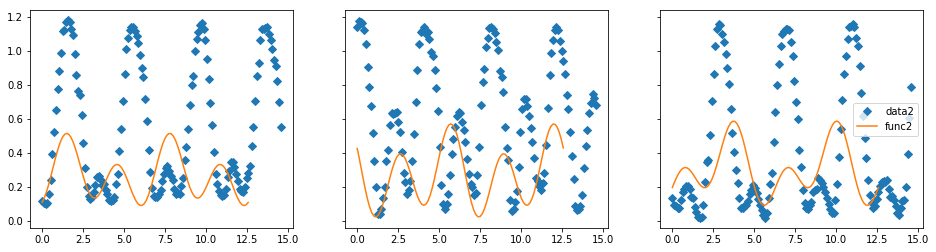

In [14]:

point = [-0.5,2.52]
point = best_pos
fun = carr(device,point)
print('cost is ',cost(fun,data))
plot3(fun)
#plt.figure(figsize=(15,5))
#plt.plot(pts,data[1],'D')
#plt.plot(*sampl(carr(unit,point),0,14))

cost 113.29622221725623


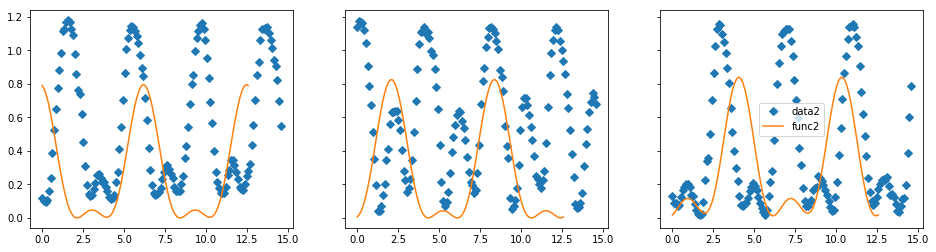

In [15]:
kek = carr(device,[0,0])
carr_dev = lambda x,y:carr(device,[x,y])
print("cost",cost(carr_dev(0,0),data))
plot3(kek)

plt.savefig('./figs/unfitted_cost19.5.eps')

In [16]:

func = lambda x: np.array([0.1,0,0.5]*len(x)).reshape(len(x),3)

print(func(np.array([2,3])))
print("cost",cost(func,data))
t_data = data[:,:]
#t_data[2,:]-=0.5
print("sumsq:",np.sum(np.square(data)))
plot3(func)


[[0.1 0.  0.5]
 [0.1 0.  0.5]]
cost 134.00996087529785


TypeError: list indices must be integers or slices, not tuple

### Optimisation


In [17]:
unit_all = lambda z,x: np.dot([0,1,0],np.abs(np.square(prob_part(z[0],z[1],z[2],z[3]+z[8]*x, phi=z[4]*x+z[5]))).T)*z[6]+z[7]
unit_all_sh = lambda z,x: np.abs(np.square(prob_part(z[0],z[1],z[2],z[3]+z[8]*x, phi=z[4]*x+z[5]))).T*z[6]+z[7]
unit_all = lambda z,x: np.abs(np.square(prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+z[5]))).T*z[6]+z[7]

In [64]:


opt = Annealer(unit_all,points_data=(pts,data),energy=0.005)
#opt = Annealer(unit_all_sh,points_data=(pts,data),energy=3)

In [65]:
start = [0,0,0,0,-1,0,1,0]
#start = [0,0,0,0,-1,0,1,0]
start = [1.97641972,  0.46830365, -2.34256105, -2.7767623,  -1.53977032, -0.45830121, 1.38391502, -0.04907852]
#start = [1.97641972,  0.46830365, -2.34256105, -2.7767623,  -1.53977032, -0.45830121, 1.48391502, -0.04907852]
#start = [-25.648831,   -16.91017209, -10.20137638 , 11.01714674, 1.12643974, -6.81656814,3.31360078,-0.39924749]
start = [ 1.97826339, 0.61469571, -2.23318571, -2.48897276,-1.56313198,-0.26907035,1.55959301, 0.06752256]
start = opt.best
#start_1d = [ -4.47259827, -16.59763161,  -0.10024442,  -4.70741011,  -1.5601084, 8.85820219,   1.26772687,  -0.01726806]
#start = [ 1.65353401, -0.47372438, -3.24028015, -2.16909992, -1.57036921,  0.08920259, 1.69030152, -0.1480717, -0.01417338]
scales= np.array([1,1,1,1,0.2,1.5,0.4,0.2])*0.01
point,cost = opt.opt(start_point=start,
                     scales = scales,
                     max_steps =10000
                    )

print(point,cost)
print(opt.best)

100%|██████████| 10000/10000 [00:26<00:00, 382.86it/s]

[ 2.12200493  0.62696993 -2.2508499  -2.41728832 -1.55980311 -0.38253577
  1.50511638  0.07446599] 36.116025590752095
[ 2.13640085  0.62250446 -2.24957228 -2.41522098 -1.55890567 -0.39356749
  1.49439776  0.0778264 ]


36.10833016650014


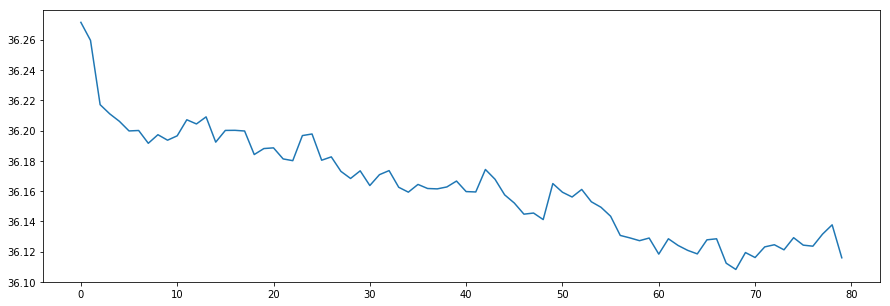

In [66]:
plt.figure(figsize=(15,5))
plt.plot(opt.costs)
print(np.min(opt.costs))

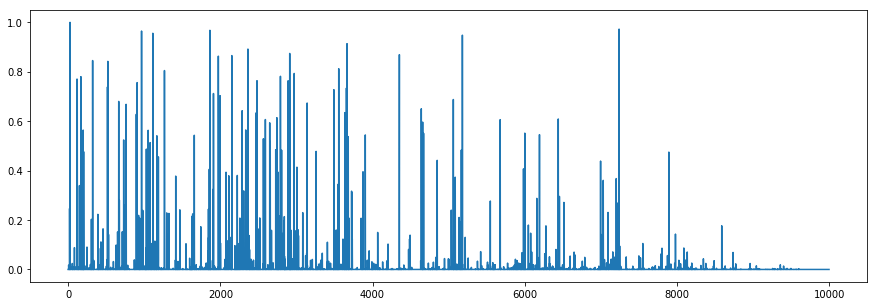

In [67]:

plt.figure(figsize=(15,5))
plt.plot(opt.probs)

36.10833016650014


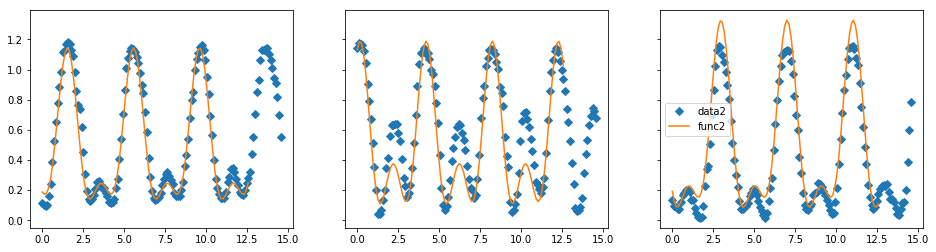

In [70]:
%matplotlib inline
unit_all_1 = lambda z,x: np.abs(np.square(prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+z[5]))).T*z[6]+z[7]
best_fun= carr(unit_all,opt.best)
print(opt.cost(best_fun))
#plot3(lambda x: best_fun(x).T,on_same=True)
plot3(lambda x: best_fun(x).T)
#plt.savefig('figs/fitted_cost1.7.eps')


46.252332825836895


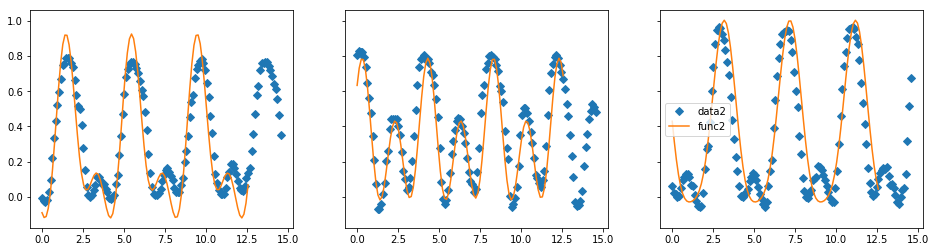

In [125]:
%matplotlib inline
unit_all_1 = lambda z,x: np.abs(np.square(prob_part(z[0],z[1],z[2],z[3], phi=z[4]*x+z[5]))).T*z[6]+z[7]
best_fun= carr(unit_all_1,opt.best)
print(opt.cost(best_fun))
plot3(lambda x: best_fun(x).T)

40.28952322087176


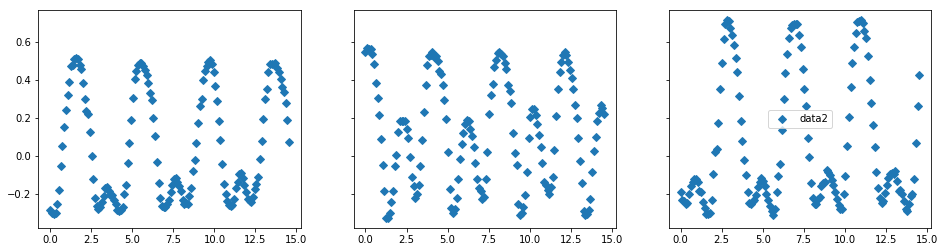

In [140]:
#lin,d = sampl(func,0,12.56,100)
#d = np.array(d).T
f = best_fun(pts)
%matplotlib inline
fs=(16,4)
print(np.sum(np.square(data - f)))
fig,ax = plt.subplots(1,3,figsize=fs,sharey=True)
for i in range(3):
    ax[i].plot(pts, data[i]-f[i],'D',label='data%i'%i)
plt.legend()
best_point = opt.best

In [116]:
print(best_point)


[-1.14090937 -4.868435    3.29710431  3.69819689 -1.54512081  3.94440442
  1.15132815 -0.04640095]
